In [134]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving bank01.csv to bank01 (3).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank01.csv']))  #導入數據集（叫做df）
# Dataset is now stored in a Pandas Dataframe

# **導入Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #導入決策樹
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs) #導出決策樹的設定
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())#圖形設定
    display(Image(graph.create_png())) #顯示圖形

# transform 跟調整

In [137]:
df['job'] = df['job'].str.lower() #lower string
df['job'] = df['job'].str.strip() 
# removing leading and trailing whitespaces
#df=df.drop(columns=['duration', 'pdays', 'campaign', 'previous'])
coded_job = {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':12}
coded_month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
coded_marital = {'married':1, 'single':2, 'divorced':3,'unknown':4}
coded_default = {'yes':1, 'no':-1,'unknown':0} 
coded_education = {'primary':1, 'secondary':2, 'tertiary':3,'unknown':4}
coded_housing = {'yes':1, 'no':-1,'unknown':0} 
coded_loan = {'yes':1, 'no':-1,'unknown':0}
coded_contact = {'cellular':1, 'unknown':0, 'telephone':2} 
coded_poutcome = {'failure':-1, 'unknown':0,'success':1,'other':2} 
coded_y = {'no':1, 'yes':-1} 

coded_df = df.replace({"month": coded_month})
coded_df = coded_df.replace({"job": coded_job})
coded_df = coded_df.replace({"marital": coded_marital})
#coded_df = coded_df.replace({"education": coded_education})
coded_df = coded_df.replace({"default": coded_default})
coded_df = coded_df.replace({"education": coded_education})
coded_df = coded_df.replace({"housing": coded_housing})
coded_df = coded_df.replace({"loan": coded_loan})
coded_df = coded_df.replace({"contact": coded_contact})
coded_df = coded_df.replace({"poutcome": coded_poutcome})
coded_df = coded_df.replace({"y":coded_y})

coded_df[0:10]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,1,1,-1,1787,-1,-1,1,19,10,79,1,-1,0,0,1
1,33,8,1,2,-1,4789,1,1,1,11,5,220,1,339,4,-1,1
2,35,5,2,3,-1,1350,1,-1,1,16,4,185,1,330,1,-1,1
3,30,5,1,3,-1,1476,1,1,0,3,6,199,4,-1,0,0,1
4,59,2,1,2,-1,0,1,-1,0,5,5,226,1,-1,0,0,1
5,35,5,2,3,-1,747,-1,-1,1,23,2,141,2,176,3,-1,1
6,36,7,1,3,-1,307,1,-1,1,14,5,341,1,330,2,2,1
7,39,10,1,2,-1,147,1,-1,1,6,5,151,2,-1,0,0,1
8,41,3,1,3,-1,221,1,-1,0,14,5,57,2,-1,0,0,1
9,43,8,1,1,-1,-88,1,1,1,17,4,313,1,147,2,-1,1


In [138]:
#check which columns have NaN in them
coded_df.isnull().any()
#show rows where yt field is NaN
#show rows where iq field is NaN
# lets clean up the codes
# ref: https://www.python-course.eu/lambda.php, http://book.pythontips.com/en/latest/lambdas.html
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(coded_df)
cleaned_df = coded_df.dropna()
cleaned_df.describe()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,5.411192,1.498120,2.231365,-0.966379,1422.657819,0.132050,-0.694315,0.773723,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,0.007299,0.769520
std,10.576211,3.255716,0.695471,0.748744,0.257150,3009.638142,0.991353,0.719750,0.555248,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.557880,0.638693
min,19.000000,1.000000,1.000000,1.000000,-1.000000,-3313.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,33.000000,2.000000,1.000000,2.000000,-1.000000,69.000000,-1.000000,-1.000000,0.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
50%,39.000000,5.000000,1.000000,2.000000,-1.000000,444.000000,1.000000,-1.000000,1.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,1.000000
75%,49.000000,8.000000,2.000000,3.000000,-1.000000,1480.000000,1.000000,-1.000000,1.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,1.000000
max,87.000000,12.000000,3.000000,4.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,2.000000,1.000000


# **切割出train/test set**

In [0]:
# importing scikit-learn library to help us split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
yy = cleaned_df.pop('y') # this is our target label
X = cleaned_df # this is our data
yy2 = yy
X2 = X
#X2 跟 yy2 做 random undersampling 
X4 = X
yy4 = yy
#X4 跟 yy4 做 random oversampling


In [0]:
X_train, X_test, yy_train, yy_test = train_test_split(X, yy, test_size=0.33, random_state=42)

In [0]:
X2_train, X2_test, yy2_train, yy2_test = train_test_split(X2, yy2, test_size=0.33, random_state=42)

In [0]:
X4_train, X4_test, yy4_train, yy4_test = train_test_split(X4, yy4, test_size=0.33, random_state=42)

# **random undersampling**

In [0]:
from imblearn.under_sampling import RandomUnderSampler #導入做random undersampling 
rus = RandomUnderSampler(random_state=42)
X2_resampled, yy2_resampled = rus.fit_sample(X2_train, yy2_train)
X2_train= X2_resampled
yy2_train = yy2_resampled


# **random oversampling**

In [0]:
from imblearn.over_sampling import RandomOverSampler #導入做random oversampling 
ros = RandomOverSampler(random_state=42)
X4_resampled, yy4_resampled = ros.fit_sample(X4_train, yy4_train)
X4_train = X4_resampled
yy4_train = yy4_resampled



# **建立Decision tree**

In [145]:
#建立decision tree相關（圖形,model)
import sklearn.datasets as datasets
#DT用來處理initial dataset
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, yy_train)
#DT2用來處理resampling(undersampling)後的dataset
dtree2 =DecisionTreeClassifier(random_state=42)
dtree2.fit(X2_train, yy2_train)
#DT3用來處理resampling(oversampling)後的dataset
dtree3 =DecisionTreeClassifier(random_state=42)
dtree3.fit(X4_train, yy4_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [0]:
#驗證decision tree
predicted_ans = dtree.predict(X_test) 
predicted_ans2 = dtree2.predict(X2_test) 
predicted_ans3 = dtree3.predict(X4_test) 

# **(dtree)Initial data**

Average precision-recall score: 0.93


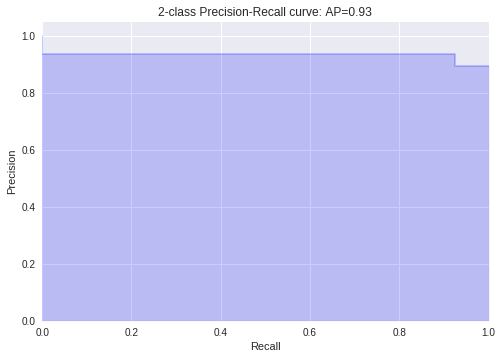

              precision    recall  f1-score   support

          no       0.94      0.93      0.93      1334
         yes       0.43      0.47      0.45       158

   micro avg       0.88      0.88      0.88      1492
   macro avg       0.68      0.70      0.69      1492
weighted avg       0.88      0.88      0.88      1492



In [147]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))
labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy_test, predicted_ans,labels=labels,target_names = targets_name))

# (dtree)Undersampling

Average precision-recall2 score: 0.94


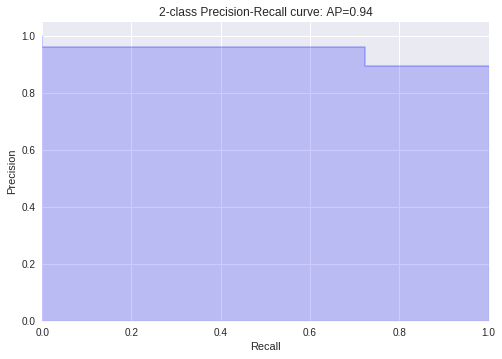

              precision    recall  f1-score   support

          no       0.96      0.72      0.83      1334
         yes       0.25      0.77      0.37       158

   micro avg       0.73      0.73      0.73      1492
   macro avg       0.61      0.74      0.60      1492
weighted avg       0.89      0.73      0.78      1492



In [148]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy2_test, predicted_ans2)

print('Average precision-recall2 score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy2_test, predicted_ans2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy2_test, predicted_ans2,labels=labels,target_names = targets_name))


# (dtree)Oversampling

Average precision-recall score: 0.92


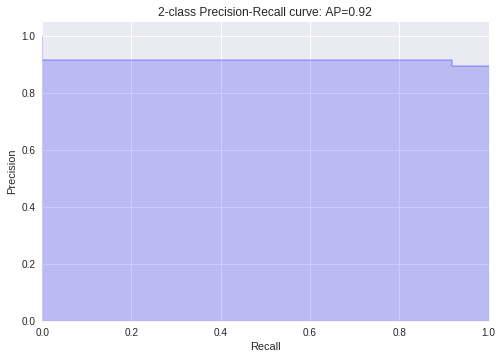

              precision    recall  f1-score   support

          no       0.92      0.92      0.92      1334
         yes       0.30      0.30      0.30       158

   micro avg       0.85      0.85      0.85      1492
   macro avg       0.61      0.61      0.61      1492
weighted avg       0.85      0.85      0.85      1492



In [149]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy4_test, predicted_ans3)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy4_test, predicted_ans3)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy4_test, predicted_ans3,labels=labels,target_names = targets_name))

# **導入跟建立random forest**

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# 載入資料

from sklearn.preprocessing import StandardScaler #導入standardscaler 

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

from sklearn.ensemble import RandomForestClassifier #導入RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor.fit(X_train, yy_train)  
r_predicted_ans = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# **(rf)Initial data**

Average precision-recall score: 0.92


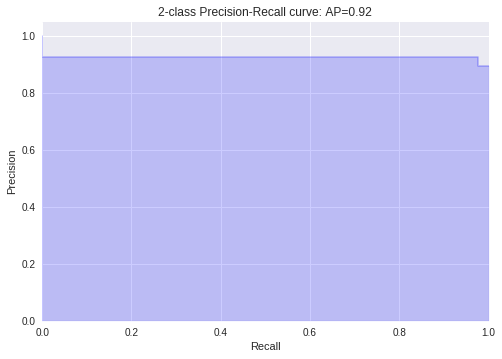

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      1334
         yes       0.62      0.34      0.43       158

   micro avg       0.91      0.91      0.91      1492
   macro avg       0.77      0.66      0.69      1492
weighted avg       0.89      0.91      0.90      1492



In [151]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy_test, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy_test, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy_test, r_predicted_ans,labels=labels,target_names = targets_name))

# **(rf)undersampling**

In [0]:
from sklearn.preprocessing import StandardScaler #導入standardscaler 
sc = StandardScaler() 
X2_train = sc.fit_transform(X2_train)  
X2_test = sc.transform(X2_test)  
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=120, random_state=2) 
regressor.fit(X2_train, yy2_train)  
r_predicted_ans2 = regressor.predict(X2_test)  


Average precision-recall score: 0.92


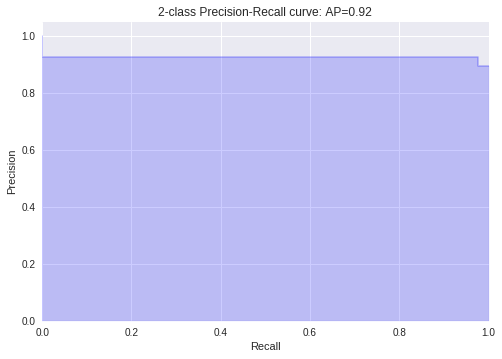

              precision    recall  f1-score   support

          no       0.98      0.80      0.88      1334
         yes       0.34      0.86      0.49       158

   micro avg       0.81      0.81      0.81      1492
   macro avg       0.66      0.83      0.69      1492
weighted avg       0.91      0.81      0.84      1492



In [161]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy2_test, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy2_test, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy2_test, r_predicted_ans2,labels=labels,target_names = targets_name))

# **(rf)oversampling**

In [0]:
from sklearn.preprocessing import StandardScaler #導入standardscaler 
sc = StandardScaler() 
X4_train = sc.fit_transform(X4_train)  
X4_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier 
regressor = RandomForestClassifier(n_estimators=120, random_state=2) 
regressor.fit(X4_train, yy4_train)  
r_predicted_ans4 = regressor.predict(X4_test)

Average precision-recall score: 0.92


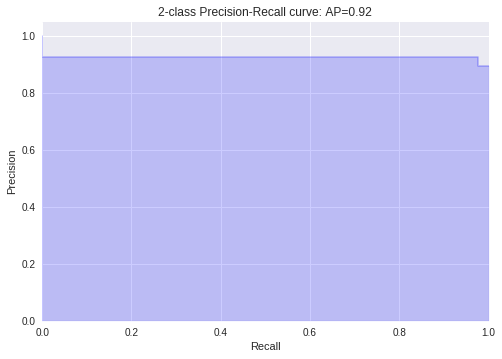

              precision    recall  f1-score   support

          no       0.94      0.93      0.93      1334
         yes       0.44      0.49      0.46       158

   micro avg       0.88      0.88      0.88      1492
   macro avg       0.69      0.71      0.70      1492
weighted avg       0.89      0.88      0.88      1492



In [158]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yy4_test, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(yy4_test, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['no','yes']
print(metrics.classification_report(yy4_test, r_predicted_ans4,labels=labels,target_names = targets_name))